In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
import time

In [17]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [18]:
train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [19]:
df_train = train.copy()
df_test = test.copy()

In [20]:
df_train.isnull().any().sum()

0

In [21]:
df_test.isnull().any().sum()

0

In [22]:
X_train= df_train.drop(['label'],axis = 1)
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train.shape

(60000, 784)

In [24]:
X_test = df_train['label']
X_test

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [25]:
X_test.shape

(60000,)

In [26]:
y_test = df_test.drop(['label'],axis = 1)
y_test.shape

(10000, 784)

In [27]:
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0

In [28]:
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_test, test_size=0.1, random_state = seed)

In [29]:
pca = PCA(n_components=100, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)

In [30]:
X_train_pca.shape

(54000, 100)

In [31]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

In [32]:
# 1. LR Model
start1 = time.time()

logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(X_train_PCA1, y_train)

end1 = time.time()
lr_time = end1-start1

# 2. SVC Model
start2 = time.time()

svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)

end2 = time.time()
svm_time = end2-start2

# 3. Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)

end3 = time.time()
forest_time = end3-start3

# 4. Gradient Boosting Method 
start4 = time.time()

Gradient = ensemble.GradientBoostingClassifier(n_estimators=100)
Gradient.fit(X_train_PCA1, y_train)

end4 = time.time()
gradient_time = end4-start4

# 5. XGBoost Method
start5 = time.time()

xgb = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror")
xgb.fit(X_train_PCA1, y_train.ravel())

end5 = time.time()
xgb_time = end5-start5


print("LR Time: {:0.2f} minute".format(lr_time/60.0))
print("SVC Time: {:0.2f} minute".format(svm_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Gradient Boosting Time: {:0.2f} minute".format(gradient_time/60.0))
print("XGBoost Time: {:0.2f} minute".format(xgb_time/60.0))

LR Time: 0.76 minute
SVC Time: 6.04 minute
Random Forest Time: 5.27 minute
Gradient Boosting Time: 89.51 minute
XGBoost Time: 0.34 minute


In [33]:
y_train_lr = logistic.predict(X_train_PCA1)
y_pred_lr = logistic.predict(X_test_pca)
logistic_train = metrics.accuracy_score(y_train,y_train_lr )
logistic_accuracy = metrics.accuracy_score(y_val, y_pred_lr)

print("Train Accuracy score: {}".format(logistic_train))
print("Test Accuracy score: {}".format(logistic_accuracy))
print(metrics.classification_report(y_val, y_pred_lr))

Train Accuracy score: 0.8461666666666666
Test Accuracy score: 0.851
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       574
           1       0.97      0.96      0.97       596
           2       0.76      0.76      0.76       573
           3       0.86      0.88      0.87       624
           4       0.77      0.78      0.78       635
           5       0.95      0.91      0.93       632
           6       0.64      0.58      0.61       600
           7       0.90      0.93      0.91       604
           8       0.92      0.93      0.93       598
           9       0.94      0.95      0.94       564

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



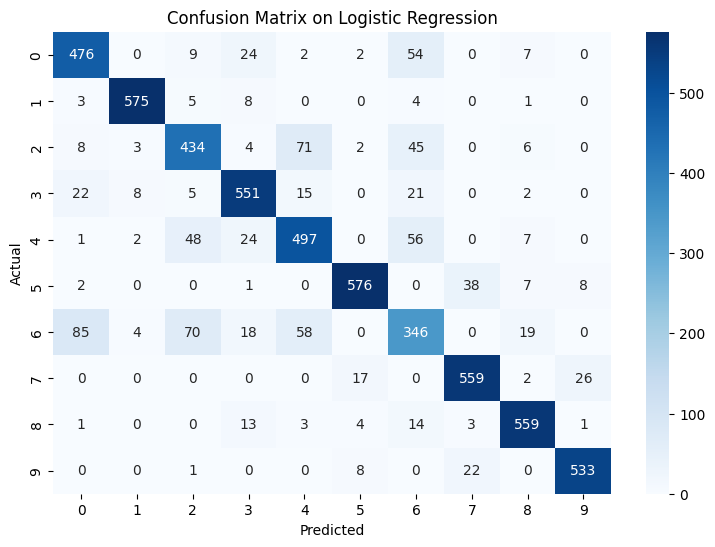

In [34]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_lr, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [35]:
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
svc_train = metrics.accuracy_score(y_train,y_train_svc)
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train))
print("Test Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_val, y_pred_svc))

Train Accuracy score: 0.9425555555555556
Test Accuracy score: 0.906
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       574
           1       0.99      0.98      0.99       596
           2       0.83      0.85      0.84       573
           3       0.91      0.93      0.92       624
           4       0.86      0.85      0.85       635
           5       0.98      0.95      0.96       632
           6       0.76      0.74      0.75       600
           7       0.93      0.97      0.95       604
           8       0.97      0.97      0.97       598
           9       0.97      0.96      0.96       564

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



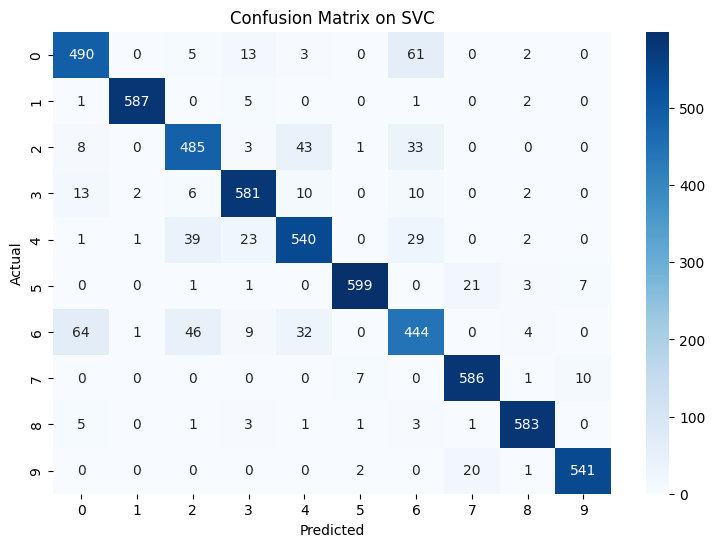

In [36]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [37]:
y_train_forest = random_forest.predict(X_train_PCA1)
y_pred_forest = random_forest.predict(X_test_pca)
random_forest_train = metrics.accuracy_score(y_train,y_train_forest)
random_forest_accuracy = metrics.accuracy_score(y_val, y_pred_forest)

print("Train Accuracy score: {}".format(random_forest_train))
print("Test Accuracy score: {}".format(random_forest_accuracy))
print(metrics.classification_report(y_val, y_pred_forest))

Train Accuracy score: 1.0
Test Accuracy score: 0.8741666666666666
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       574
           1       1.00      0.96      0.98       596
           2       0.77      0.82      0.79       573
           3       0.88      0.91      0.89       624
           4       0.82      0.83      0.82       635
           5       0.94      0.93      0.93       632
           6       0.73      0.59      0.65       600
           7       0.92      0.94      0.93       604
           8       0.95      0.97      0.96       598
           9       0.94      0.95      0.94       564

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



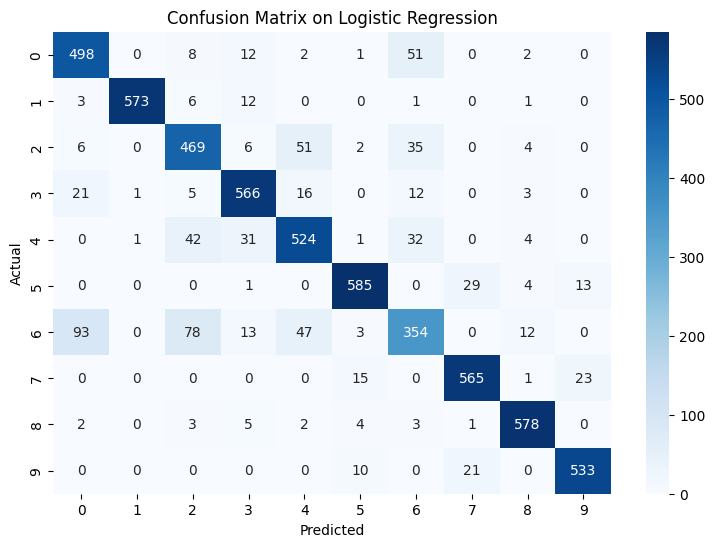

In [38]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_forest, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [39]:
y_train_gradient = Gradient.predict(X_train_PCA1)
y_pred_gradient = Gradient.predict(X_test_pca)
gradient_train = metrics.accuracy_score(y_train,y_train_gradient)
gradient_accuracy = metrics.accuracy_score(y_val, y_pred_gradient)

print("Train Accuracy score: {}".format(gradient_train))
print("Test Accuracy score: {}".format(gradient_accuracy))
print(metrics.classification_report(y_val, y_pred_gradient))

Train Accuracy score: 0.8796666666666667
Test Accuracy score: 0.86
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       574
           1       0.98      0.97      0.98       596
           2       0.77      0.78      0.78       573
           3       0.86      0.89      0.88       624
           4       0.80      0.80      0.80       635
           5       0.94      0.90      0.92       632
           6       0.67      0.61      0.64       600
           7       0.91      0.93      0.92       604
           8       0.94      0.94      0.94       598
           9       0.92      0.95      0.94       564

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



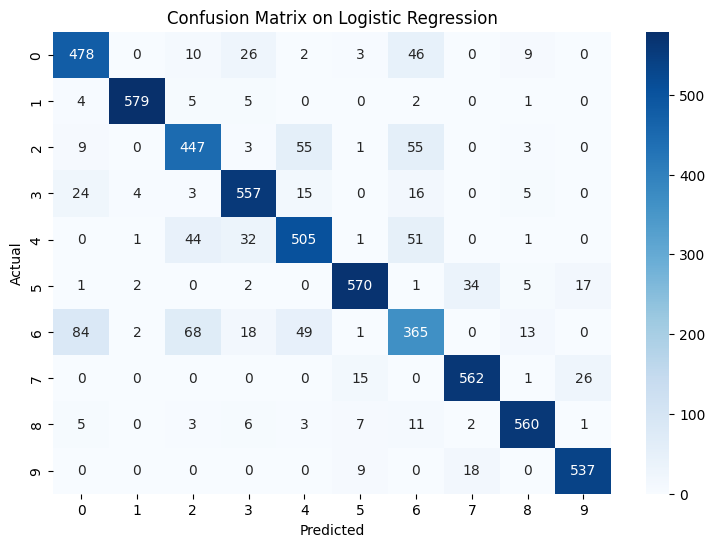

In [40]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_gradient, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [41]:
y_train_xgboost = xgb.predict(X_train_PCA1)
y_pred_xgboost = xgb.predict(X_test_pca)
xgb_train = metrics.accuracy_score(y_train,y_train_xgboost)
xgb_accuracy = metrics.accuracy_score(y_val, y_pred_xgboost)

print("Train Accuracy score: {}".format(xgb_train))
print("Test Accuracy score: {}".format(xgb_accuracy))
print(metrics.classification_report(y_val, y_pred_xgboost))

Train Accuracy score: 0.9989629629629629
Test Accuracy score: 0.8873333333333333
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       574
           1       1.00      0.97      0.98       596
           2       0.79      0.80      0.80       573
           3       0.89      0.91      0.90       624
           4       0.83      0.82      0.83       635
           5       0.97      0.94      0.95       632
           6       0.70      0.69      0.70       600
           7       0.93      0.96      0.95       604
           8       0.96      0.96      0.96       598
           9       0.96      0.96      0.96       564

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



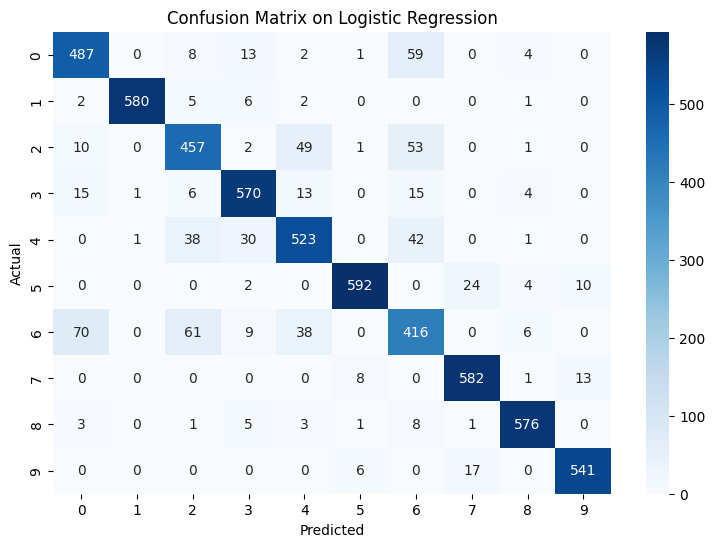

In [42]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_xgboost, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()

In [43]:
Train_Accuracy = [logistic_train,svc_train,random_forest_train,gradient_train,xgb_train]
Test_Accuracy = [logistic_accuracy,svc_accuracy,random_forest_accuracy,gradient_accuracy,xgb_accuracy]
data1 = {
    'Algorithm': ['Logistic Regression','SVC','Random Forest Classifier','Gradient Boosting','XGBoost'],
    'Train Accuracy':Train_Accuracy,
    'Test Accuracy':Test_Accuracy
}

df1 = pd.DataFrame(data1)

In [44]:
df1

,Algorithm,Train Accuracy,Test Accuracy
0,Logistic Regression,0.846167,0.851000
1,SVC,0.942556,0.906000
2,Random Forest Classifier,1.000000,0.874167
3,Gradient Boosting,0.879667,0.860000
4,XGBoost,0.998963,0.887333


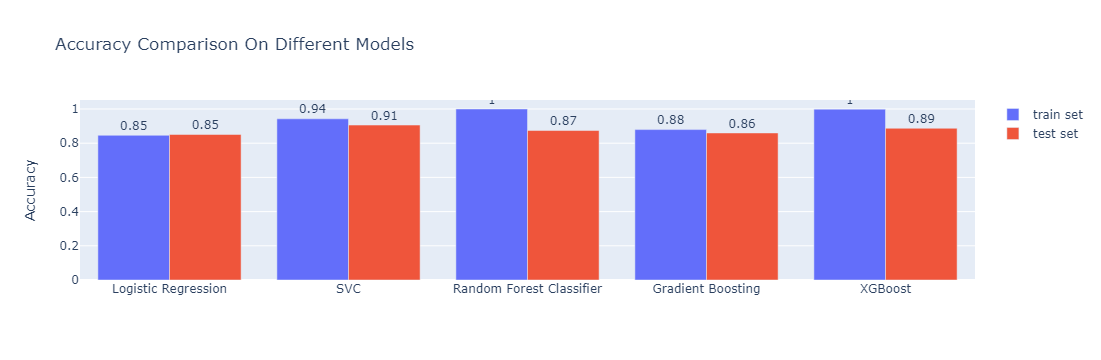

In [46]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=data1['Algorithm'], y=data1['Train Accuracy'],text=np.round(data1['Train Accuracy'],2),textposition='outside'),
    go.Bar(name='test set', x=data1['Algorithm'], y=data1['Test Accuracy'],text=np.round(data1['Test Accuracy'],2),textposition='outside')
])

fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show()